## Adquisición y preprocesamiento de la información - RafaC

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




# Escalado: estandarización y normalización

### Índice
[Ejemplo](#ejemplo)<br>
[Estandarización](#estandarización)<br>
[Normalización](#normalización)<br>
[Otros normalizadores](#otros)<br>

<a name="ejemplo"></a>
#### Ejemplo

Tenemos datos de altura y número de zapato de unas cuantas personas

array([[<AxesSubplot: title={'center': 'alto'}>,
        <AxesSubplot: title={'center': 'pie'}>]], dtype=object)

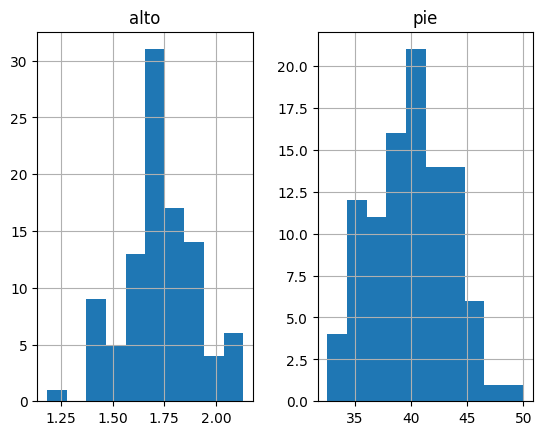

In [52]:
import statistics as s
import numpy as np
import pandas as pd

size = 100
n = s.NormalDist(mu=1.76, sigma=0.16) # generador de números siguiendo una normal N(1.76,0.16)
altura = n.samples(size,seed=3)  
altura = np.array(altura).round(4)
n2 = s.NormalDist(mu=40, sigma=3.2) # generador de números siguiendo una normal N(40,3.2)
zapato = n2.samples(size,seed=30) 
zapato = np.array(zapato).round(2)

df = pd.DataFrame({"alto":altura,"pie":zapato})

df.hist()               


In [53]:
altura

array([1.7752, 1.96  , 1.611 , 1.9188, 1.7185, 1.7182, 2.064 , 1.7852,
       1.7531, 1.8767, 1.9403, 1.7551, 1.8541, 1.6042, 1.7013, 1.6899,
       1.5468, 1.5186, 1.4997, 1.7218, 1.7324, 1.7087, 1.7711, 1.5463,
       1.7473, 1.7981, 1.8802, 1.6246, 1.696 , 1.4376, 1.6794, 1.4085,
       1.5329, 1.9362, 1.4077, 1.8878, 1.8125, 1.71  , 1.8335, 1.8444,
       1.9273, 1.7231, 1.6652, 1.6633, 1.6022, 1.7528, 1.6343, 1.931 ,
       1.4609, 1.585 , 1.6075, 1.4251, 2.0644, 1.3747, 1.7147, 1.676 ,
       2.0249, 1.4423, 1.9315, 1.643 , 1.7352, 1.6526, 1.8625, 1.578 ,
       1.7474, 1.8165, 2.0544, 1.3752, 2.004 , 1.9117, 1.6826, 1.8088,
       1.6854, 2.0235, 1.7935, 1.7255, 1.7235, 1.728 , 1.7317, 1.6194,
       2.0893, 1.4542, 1.1831, 1.7403, 1.7365, 1.8196, 1.7273, 1.7363,
       1.8132, 1.9149, 1.6883, 1.7003, 2.0705, 1.8448, 1.6023, 2.1318,
       1.8841, 1.6658, 1.5721, 1.8077])

In [54]:
zapato

array([37.44, 39.36, 44.58, 40.87, 40.61, 42.39, 36.34, 42.76, 43.55,
       39.75, 50.01, 39.59, 40.06, 41.24, 43.3 , 45.19, 34.21, 35.81,
       44.59, 39.19, 38.83, 39.74, 45.73, 40.85, 37.44, 35.21, 35.61,
       38.08, 35.63, 34.8 , 42.85, 42.41, 37.81, 45.61, 41.75, 38.3 ,
       42.09, 41.16, 37.83, 45.04, 35.51, 42.86, 38.77, 43.7 , 41.79,
       44.24, 33.65, 39.48, 43.68, 38.77, 46.85, 43.13, 43.41, 38.77,
       32.6 , 40.67, 39.94, 42.46, 38.38, 35.48, 37.65, 34.47, 36.67,
       39.74, 40.34, 42.19, 37.67, 42.48, 39.71, 35.56, 36.88, 39.79,
       37.79, 37.77, 41.35, 35.6 , 38.95, 37.09, 34.92, 39.43, 43.78,
       38.94, 37.89, 44.42, 42.11, 41.97, 43.97, 40.83, 39.92, 43.19,
       41.06, 35.58, 43.37, 40.8 , 45.95, 40.25, 33.76, 40.14, 39.45,
       45.93])

Los datos no son nada "reales" (¿por qué?) pero nos valen para un experimento sencillo

In [55]:
df.sample(10).sort_values(by=["alto"])

alto    pie
82  1.1831  37.89
31  1.4085  42.41
57  1.4423  42.46
55  1.6760  40.67
72  1.6854  37.79
76  1.7235  38.95
78  1.7317  34.92
60  1.7352  37.65
83  1.7403  44.42
92  2.0705  43.37

Veamos si es normal, apuntada, simétrica, etc.

In [56]:
from scipy.stats import normaltest
from scipy.stats import skew,skewtest,kurtosis,kurtosistest

def asimetría(x):
    s = skew(x,nan_policy='omit')
    e,p  = skewtest(x,nan_policy='omit')
    msg = ("Asimetría a la derecha " if s > 0 else "asimetría negativa" ) if p<0.05 else "no se puede descartar simetría"
    return s,e,p,msg

def curtosis(x):
    k = kurtosis(x,nan_policy='omit')
    e,p  = kurtosistest(x,nan_policy='omit')
    msg = ("Leptocúrtica " if k > 0 else "platicúrtica" ) if p<0.05 else "no se puede descartar curtosis normal"
    return k,e,p,msg

def normal(data):
    k2, p = normaltest(data,nan_policy="omit")
    if p<0.05:
        msg = "Se rechaza H0: no sigue una distribución normal"
    else:    
        msg = "No se rechaza H0; no podemos descartar  una distribución normal"
    return msg,round(p,4),round(k2,4)

In [57]:
cs = ["alto","pie"]
for c in cs:
    print(c)
    m,p,e = normal(df[c])
    print(m,p,e)
    if p>0.05:
        print(curtosis(df[c]))
        print(asimetría(df[c]))
    

alto
No se rechaza H0; no podemos descartar  una distribución normal 0.5561 1.1737
(0.20806430241671459, 0.7445631729625118, 0.456535837933258, 'no se puede descartar curtosis normal')
(-0.18231155598056784, -0.7869687716964887, 0.4313001471417156, 'no se puede descartar simetría')
pie
No se rechaza H0; no podemos descartar  una distribución normal 0.7758 0.5076
(-0.35296820207172264, -0.5947739055322828, 0.5519946124588391, 'no se puede descartar curtosis normal')
(0.09041098342882287, 0.392221123620988, 0.6948948376514785, 'no se puede descartar simetría')


Se trata de una normal "normalísima". Supongamos ahora que tenemos una actividad que requiere tener pie pequeño y bastante altura, digamos 36 de pie y 1.95 de altura. ¿Qué valores en df se acercan más a este estándar? Podemos utilizar la fórmula de la distancia para ello:

$[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{(\frac{1}{2})}$

In [58]:
x1 = 1.95
y1 = 36

df2 = df.copy()
df2["dist"] = ((df.alto-x1)**2 + (df.pie-y1)**2)**0.5

df2.sort_values(by=["dist"])

alto    pie       dist
6   2.0640  36.34   0.358603
26  1.8802  35.61   0.396197
69  1.9117  35.56   0.441664
28  1.6960  35.63   0.448794
75  1.7255  35.60   0.458694
..     ...    ...        ...
22  1.7711  45.73   9.731645
99  1.8077  45.93   9.931020
94  1.6023  45.95   9.956073
50  1.6075  46.85  10.855404
10  1.9403  50.01  14.010003

[100 rows x 3 columns]

¿Qué ocurre? ¿Por qué no funciona?

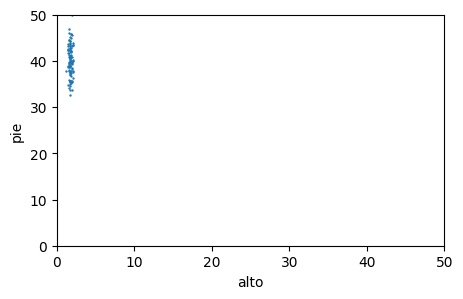

In [59]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5, 3))
dfs = df
ax.scatter(dfs.alto,dfs.pie,s=0.5)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

¡¡Prácticamente hay una sopla dimensión!! 

<a name="estandarizacion"></a>
#### Estandarización

¿Cuál es la solución? **Estandarizar**  (también conocida como *estandarización Z*, o *Z-score standarization*), que es la forma de escalado más habitual entre datos que siguen aproximadamente una normal (y que a veces también se usa con datos que no la siguen!)


La idea es convertir las distribuciones en una N(0,1) para facilitar la comparación

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*dZlwWGNhFco5bmpfwYyLCQ.png" width=300/>

La transformación es sencilla, dada una columna $x$ con media $\mu$ y desviación típica $\sigma$ vamos a construir una versión:


$$
z = \frac{x - \mu}{\sigma}
$$

Vamos a hacerlo primero "a mano"

In [60]:
media_alto,media_pie = df.mean()
dt_alto,dt_pie = df.std()

dfs = df.copy()
dfs["alto_s"] = (df.alto-media_alto)/dt_alto
dfs["pie_s"] = (df.pie-media_pie)/dt_pie


In [61]:
media_alto_s,media_pie_s = dfs[["alto_s","pie_s"]].mean()
dt_alto_s,dt_pie_s = dfs[["alto_s","pie_s"]].std()

In [62]:
media_alto,media_pie

(1.732987, 40.11109999999999)

In [63]:
dt_alto,dt_pie

(0.1787150904838947, 3.418395835901555)

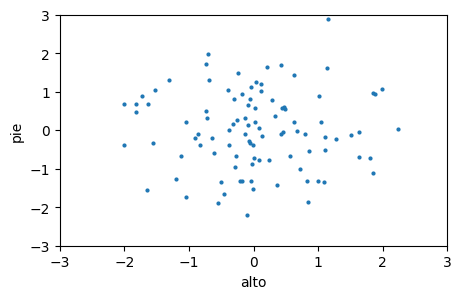

In [64]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfs.alto_s,dfs.pie_s,s=4)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

In [65]:
dfs

alto    pie    alto_s     pie_s
0   1.7752  37.44  0.236203 -0.781390
1   1.9600  39.36  1.270251 -0.219723
2   1.6110  44.58 -0.682578  1.307309
3   1.9188  40.87  1.039716  0.222005
4   1.7185  40.61 -0.081062  0.145946
..     ...    ...       ...       ...
95  2.1318  40.25  2.231557  0.040633
96  1.8841  33.76  0.845553 -1.857918
97  1.6658  40.14 -0.375945  0.008454
98  1.5721  39.45 -0.900243 -0.193395
99  1.8077  45.93  0.418056  1.702231

[100 rows x 4 columns]

In [66]:
x1 = (1.95-media_alto)/dt_alto
y1 = (36-media_pie)/dt_pie

df2 = dfs.copy()
df2["dist"] = ((dfs.alto_s-x1)**2 + (dfs.pie_s-y1)**2)**0.5

df2.sort_values(by=["dist"])

alto    pie    alto_s     pie_s      dist
40  1.9273  35.51  1.087278 -1.345982  0.191521
69  1.9117  35.56  0.999988 -1.331355  0.249991
26  1.8802  35.61  0.823730 -1.316729  0.406888
62  1.8625  36.67  0.724690 -1.006642  0.527380
6   2.0640  36.34  1.852183 -1.103178  0.645594
..     ...    ...       ...       ...       ...
51  1.4251  43.13 -1.722781  0.883134  3.602343
50  1.6075  46.85 -0.702162  1.971363  3.707709
67  1.3752  42.48 -2.001997  0.692986  3.733354
10  1.9403  50.01  1.160020  2.895773  4.098773
82  1.1831  37.89 -3.076892 -0.649749  4.326659

[100 rows x 5 columns]

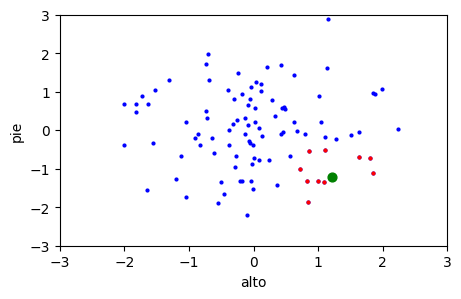

In [67]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfs.alto_s,dfs.pie_s,s=4,color="blue")
ax.scatter([x1],[y1],s=40,color="green")
cercanos = df2.sort_values(by=["dist"]).head(10)
ax.scatter(cercanos.alto_s,cercanos.pie_s,s=4,color="red")

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

In [68]:
x1,y1

(1.2142958908081491, -1.2026401263491322)

Hay muchos métodos que ML que requerirán estandarización, tantos que aunque es una trnasformación bastante simple de implementar es muy normal utilizar la versión incluída en la bibliteca sklearn

In [69]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler() # 1 declarar el método
scaler.fit(df)  # 2 "aprender" de los datos (en este caso obtener la media y la desviación típica)
datos = scaler.transform(df) # aplicar el método ya instanciado a los datos
dfs = pd.DataFrame(datos,columns=["alto_s","pie_s"]) # convertir a DataFrame
dfs

alto_s     pie_s
0   0.237393 -0.785326
1   1.276650 -0.220830
2  -0.686017  1.313895
3   1.044954  0.223123
4  -0.081470  0.146681
..       ...       ...
95  2.242800  0.040838
96  0.849812 -1.867278
97 -0.377839  0.008497
98 -0.904778 -0.194369
99  0.420163  1.710807

[100 rows x 2 columns]

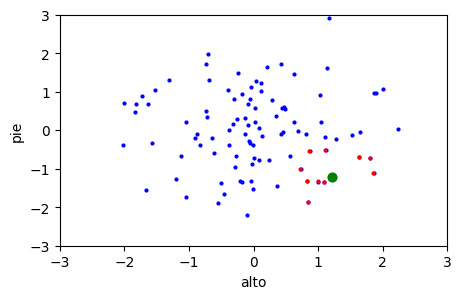

In [70]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfs.alto_s,dfs.pie_s,s=4,color="blue")
ax.scatter([x1],[y1],s=40,color="green")
cercanos = df2.sort_values(by=["dist"]).head(10)
ax.scatter(cercanos.alto_s,cercanos.pie_s,s=4,color="red")

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

Un último apunte: el que queramos estandarizar (o usar otro escalado) va a depender de la situación. Por ejemplo siquieremos disitnguir días soleados de nublados a partir de datos de sensores puede ser una mala idea:

<img src="https://github.com/RafaelCaballero/tdm/raw/master/images/soleadonublado.png" />

<a name="normalizacion"></a>
#### Normalización

Hay otras formas de escalar alternativas, que en ocasiones resultan muy útiles, especialmente (pero no solo) con datos que no siguen una normal. El más habitual es el MIN-MAX scaler que convierte la columna al rango 0-1 aplicando esta sencilla transformación: dada una variable/columna $x$ con máximo $M$ y mínimo $m$, se define la transformación min-max $x'$

$$
x' = \frac{x-m}{M-m}
$$



In [71]:
df

alto    pie
0   1.7752  37.44
1   1.9600  39.36
2   1.6110  44.58
3   1.9188  40.87
4   1.7185  40.61
..     ...    ...
95  2.1318  40.25
96  1.8841  33.76
97  1.6658  40.14
98  1.5721  39.45
99  1.8077  45.93

[100 rows x 2 columns]

In [72]:
alto_m, pie_m = df.min()
alto_M, pie_M = df.max()

In [73]:
dfn = df.copy()
dfn["alto_n"] = (df.alto-alto_m)/(alto_M-alto_m)
dfn["pie_n"] = (df.pie-pie_m)/(pie_M-pie_m)
dfn

alto    pie    alto_n     pie_n
0   1.7752  37.44  0.624117  0.278001
1   1.9600  39.36  0.818910  0.388283
2   1.6110  44.58  0.451038  0.688110
3   1.9188  40.87  0.775482  0.475014
4   1.7185  40.61  0.564351  0.460080
..     ...    ...       ...       ...
95  2.1318  40.25  1.000000  0.439403
96  1.8841  33.76  0.738906  0.066628
97  1.6658  40.14  0.508802  0.433084
98  1.5721  39.45  0.410035  0.393452
99  1.8077  45.93  0.658375  0.765652

[100 rows x 4 columns]

In [74]:
xn = (1.95-alto_m)/(alto_M-alto_m)
yn = (36-pie_m)/(pie_M-pie_m)

df2n = dfn.copy()
df2n["dist"] = ((dfn.alto_n-xn)**2 + (dfn.pie_n-yn)**2)**0.5

df2n.sort_values(by=["dist"])

alto    pie    alto_n     pie_n      dist
40  1.9273  35.51  0.784442  0.167145  0.036941
69  1.9117  35.56  0.767998  0.170017  0.047629
26  1.8802  35.61  0.734795  0.172889  0.076909
62  1.8625  36.67  0.716138  0.233774  0.099938
6   2.0640  36.34  0.928534  0.214819  0.121741
..     ...    ...       ...       ...       ...
51  1.4251  43.13  0.255086  0.604825  0.688361
67  1.3752  42.48  0.202488  0.567490  0.711073
50  1.6075  46.85  0.447349  0.818495  0.720222
10  1.9403  50.01  0.798145  1.000000  0.804775
82  1.1831  37.89  0.000000  0.303848  0.815626

[100 rows x 5 columns]

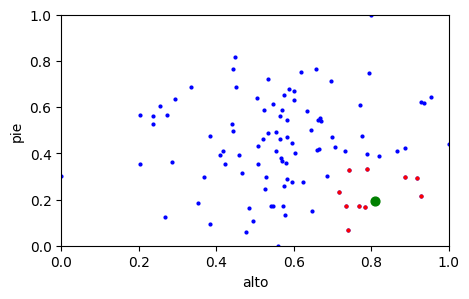

In [78]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfn.alto_n,dfn.pie_n,s=4,color="blue")
ax.scatter([xn],[yn],s=40,color="green")
cercanos = df2n.sort_values(by=["dist"]).head(10)
ax.scatter(cercanos.alto_n,cercanos.pie_n,s=4,color="red")

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

De nuevo podemos utilizar la librería 

In [88]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


scaler = MinMaxScaler() # 1 declarar el método
scaler.fit(df)  # 2 "aprender" de los datos (en este caso obtener la media y la desviación típica)
datos = scaler.transform(df) # aplicar el método ya instanciado a los datos
dfs = pd.DataFrame(datos,columns=["alto_s","pie_s"]) # convertir a DataFrame
dfs

alto_s     pie_s
0   0.624117  0.278001
1   0.818910  0.388283
2   0.451038  0.688110
3   0.775482  0.475014
4   0.564351  0.460080
..       ...       ...
95  1.000000  0.439403
96  0.738906  0.066628
97  0.508802  0.433084
98  0.410035  0.393452
99  0.658375  0.765652

[100 rows x 2 columns]

In [89]:
scaler.transform([[1.95,36]])

C:\Users\Rafa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.80836935, 0.19529006]])

In [90]:
xn,yn = scaler.transform([[1.95,36]])[0]

C:\Users\Rafa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [93]:
df2n = dfs.copy()
df2n["dist"] = ((dfs.alto_s-xn)**2 + (dfs.pie_s-yn)**2)**0.5

df2n.sort_values(by=["dist"])

alto_s     pie_s      dist
40  0.784442  0.167145  0.036941
69  0.767998  0.170017  0.047629
26  0.734795  0.172889  0.076909
62  0.716138  0.233774  0.099938
6   0.928534  0.214819  0.121741
..       ...       ...       ...
51  0.255086  0.604825  0.688361
67  0.202488  0.567490  0.711073
50  0.447349  0.818495  0.720222
10  0.798145  1.000000  0.804775
82  0.000000  0.303848  0.815626

[100 rows x 3 columns]

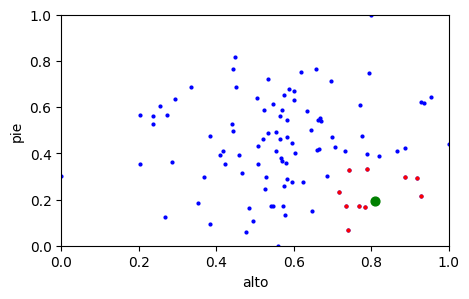

In [95]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfs.alto_s,dfs.pie_s,s=4,color="blue")
ax.scatter([xn],[yn],s=40,color="green")
cercanos = df2n.sort_values(by=["dist"]).head(10)
ax.scatter(cercanos.alto_s,cercanos.pie_s,s=4,color="red")

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

El usar el mismo esquema nos permite escribir una función que sea independiente del método

In [98]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

def escala(df,metodo,columnas):
    metodo.fit(df)
    datos = metodo.transform(df)
    return pd.DataFrame(datos,columns=columnas)
    
    
dfmM = escala(df, MinMaxScaler(), ["alto_s","pie_s"])
dfs  = escala(df, StandardScaler(), ["alto_s","pie_s"])



<a name="otros"></a>
#### Otros normalizadores
Un problema conocido en el caso de maxmin, y una razón por la que a menudo se prefiere la estandarización 

In [110]:
df2 = df.copy()
df2.iloc[0,0]=40 # un error en los datos
df2

alto    pie
0   40.0000  37.44
1    1.9600  39.36
2    1.6110  44.58
3    1.9188  40.87
4    1.7185  40.61
..      ...    ...
95   2.1318  40.25
96   1.8841  33.76
97   1.6658  40.14
98   1.5721  39.45
99   1.8077  45.93

[100 rows x 2 columns]

C:\Users\Rafa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


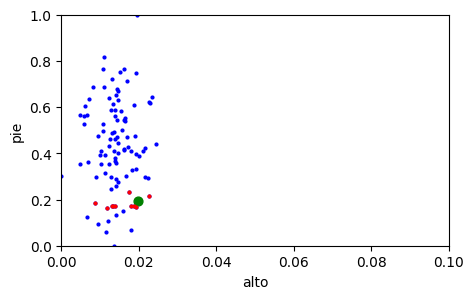

In [112]:
minmax =  MinMaxScaler()
dfs = escala(df2, minmax, ["alto_s","pie_s"])

# distancias
xn,yn = minmax.transform([[1.95,36]])[0]
df2n = dfs.copy()
df2n["dist"] = ((dfs.alto_s-xn)**2 + (dfs.pie_s-yn)**2)**0.5



fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfs.alto_s,dfs.pie_s,s=4,color="blue")
ax.scatter([xn],[yn],s=40,color="green")
cercanos = df2n.sort_values(by=["dist"]).head(10)
ax.scatter(cercanos.alto_s,cercanos.pie_s,s=4,color="red")

plt.xlim(0,0.1)
plt.ylim(0,1)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

Para evitar este problema existen otras versiones como RobusScaler que se basan en la mediana

C:\Users\Rafa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


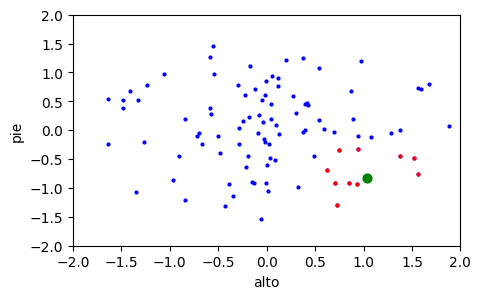

In [114]:
from sklearn.preprocessing import RobustScaler

escalador =    RobustScaler() 
dfs = escala(df2, escalador, ["alto_s","pie_s"])

# distancias
xn,yn = escalador.transform([[1.95,36]])[0]
df2n = dfs.copy()
df2n["dist"] = ((dfs.alto_s-xn)**2 + (dfs.pie_s-yn)**2)**0.5



fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(dfs.alto_s,dfs.pie_s,s=4,color="blue")
ax.scatter([xn],[yn],s=40,color="green")
cercanos = df2n.sort_values(by=["dist"]).head(10)
ax.scatter(cercanos.alto_s,cercanos.pie_s,s=4,color="red")

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("alto")
plt.ylabel("pie")
plt.show()

[Aquí](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) se puede encontrar una comparativa del efecto que pueden tener los outliers comparando estos y otros escaladores